In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 33)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

16

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.47652 stdev: 0.10934
Best fitness: 0.76190 - size: (2, 13) - species 1 - id 7
Average adjusted fitness: 0.233
Mean genetic distance 2.875, standard deviation 0.498
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 7.091 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54173 stdev: 0.10706
Best fitness: 0.76190 - size: (2, 13) - species 1 - id 7
Average adjusted fitness: 0.222
Mean genetic distance 3.006, standard deviation 0.503
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 6.384 sec (6.738 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56738 stdev: 0.10251
Best fitness: 0.77242 - size: (4, 17) - species 11 - id 416
Average adjusted fitness: 0.215
Mean genetic distance 2.940, standard deviation 0.486
Population of 204 members in 31 species
Total extinctions:

Population's average fitness: 0.66383 stdev: 0.11083
Best fitness: 0.81200 - size: (6, 19) - species 30 - id 3097
Average adjusted fitness: 0.265
Mean genetic distance 3.280, standard deviation 0.480
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 7.885 sec (7.935 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67363 stdev: 0.11181
Best fitness: 0.83859 - size: (8, 24) - species 27 - id 3477
Average adjusted fitness: 0.365
Mean genetic distance 3.280, standard deviation 0.480
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 8.266 sec (7.988 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66361 stdev: 0.12221
Best fitness: 0.83859 - size: (8, 24) - species 27 - id 3477
Average adjusted fitness: 0.271
Mean genetic distance 3.265, standard deviation 0.487
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 8.275 sec (8.046 average)

 ******

Mean genetic distance 2.996, standard deviation 0.510
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 7.399 sec (7.431 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.80160 stdev: 0.20460
Best fitness: 0.93816 - size: (6, 19) - species 19 - id 2359
Average adjusted fitness: 0.695
Mean genetic distance 3.001, standard deviation 0.528
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 7.521 sec (7.484 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.81496 stdev: 0.18553
Best fitness: 0.94620 - size: (3, 16) - species 10 - id 2619
Average adjusted fitness: 0.698
Mean genetic distance 3.026, standard deviation 0.535
Population of 190 members in 28 species
Total extinctions: 0
Generation time: 7.612 sec (7.540 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.82294 stdev: 0.18544
Best fitness: 0.94620 - size: (3, 16) - species 10 - id 2619


Mean genetic distance 3.118, standard deviation 0.468
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 6.767 sec (6.547 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60095 stdev: 0.10375
Best fitness: 0.81076 - size: (3, 14) - species 22 - id 1160
Average adjusted fitness: 0.260
Mean genetic distance 3.114, standard deviation 0.461
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 6.994 sec (6.603 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60069 stdev: 0.10104
Best fitness: 0.81076 - size: (3, 14) - species 22 - id 1160
Average adjusted fitness: 0.264
Mean genetic distance 3.104, standard deviation 0.476
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 7.079 sec (6.656 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61189 stdev: 0.10419
Best fitness: 0.82808 - size: (5, 16) - species 22 - id 1396
Ave

Mean genetic distance 3.263, standard deviation 0.507
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 8.001 sec (8.157 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.65205 stdev: 0.11339
Best fitness: 0.83859 - size: (4, 18) - species 5 - id 3704
Average adjusted fitness: 0.338
Mean genetic distance 3.245, standard deviation 0.516
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 8.317 sec (8.133 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65208 stdev: 0.11234
Best fitness: 0.83859 - size: (4, 18) - species 5 - id 3704
Average adjusted fitness: 0.320
Mean genetic distance 3.238, standard deviation 0.518
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 7.998 sec (8.154 average)
number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.52448 stdev: 0.09976
Best fitness: 0.79468 

Mean genetic distance 3.336, standard deviation 0.495
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 8.153 sec (7.800 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.67341 stdev: 0.12107
Best fitness: 0.85529 - size: (8, 24) - species 3 - id 2813
Average adjusted fitness: 0.476
Mean genetic distance 3.332, standard deviation 0.492
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.899 sec (7.867 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66468 stdev: 0.12508
Best fitness: 0.85529 - size: (8, 24) - species 3 - id 2813
Average adjusted fitness: 0.359
Mean genetic distance 3.317, standard deviation 0.496
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.120 sec (7.909 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.67745 stdev: 0.11454
Best fitness: 0.85776 - size: (9, 27) - species 3 - id 3332
Ave

Mean genetic distance 3.194, standard deviation 0.490
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 7.350 sec (7.102 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59826 stdev: 0.07391
Best fitness: 0.74768 - size: (4, 19) - species 3 - id 1132
Average adjusted fitness: 0.171
Mean genetic distance 3.199, standard deviation 0.485
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 7.416 sec (7.178 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60039 stdev: 0.07453
Best fitness: 0.74768 - size: (4, 19) - species 3 - id 1132
Average adjusted fitness: 0.211
Mean genetic distance 3.189, standard deviation 0.489
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 7.973 sec (7.306 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59641 stdev: 0.07576
Best fitness: 0.74768 - size: (4, 19) - species 3 - id 1132
Ave

Mean genetic distance 3.113, standard deviation 0.510
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.617 sec (6.125 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55386 stdev: 0.06867
Best fitness: 0.69882 - size: (2, 13) - species 32 - id 506
Average adjusted fitness: 0.202
Mean genetic distance 3.140, standard deviation 0.516
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.810 sec (6.262 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55927 stdev: 0.06790
Best fitness: 0.70686 - size: (2, 13) - species 32 - id 941
Average adjusted fitness: 0.143
Mean genetic distance 3.147, standard deviation 0.504
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.804 sec (6.353 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56993 stdev: 0.06451
Best fitness: 0.73036 - size: (4, 17) - species 1 - id 1059
Averag

Mean genetic distance 3.238, standard deviation 0.501
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 8.046 sec (7.647 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.59406 stdev: 0.08343
Best fitness: 0.75139 - size: (7, 20) - species 7 - id 2373
Average adjusted fitness: 0.188
Mean genetic distance 3.226, standard deviation 0.507
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 8.200 sec (7.747 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.60528 stdev: 0.07899
Best fitness: 0.75139 - size: (7, 20) - species 7 - id 2373
Average adjusted fitness: 0.148
Mean genetic distance 3.203, standard deviation 0.509
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 8.021 sec (7.792 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.60483 stdev: 0.07651
Best fitness: 0.75139 - size: (7, 20) - species 7 - id 2373
Ave

Population of 194 members in 28 species
Total extinctions: 0
Generation time: 7.537 sec (7.494 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.76470 stdev: 0.11755
Best fitness: 0.87693 - size: (7, 20) - species 32 - id 2255
Average adjusted fitness: 0.562
Mean genetic distance 3.230, standard deviation 0.494
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.585 sec (7.518 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.75268 stdev: 0.14883
Best fitness: 0.88497 - size: (6, 19) - species 10 - id 3064
Average adjusted fitness: 0.541
Mean genetic distance 3.202, standard deviation 0.491
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 7.951 sec (7.586 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.73252 stdev: 0.16989
Best fitness: 0.88497 - size: (8, 22) - species 32 - id 3208
Average adjusted fitness: 0.527
Mean genetic distance 

Mean genetic distance 3.059, standard deviation 0.473
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.099 sec (6.642 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65438 stdev: 0.11217
Best fitness: 0.84787 - size: (7, 22) - species 21 - id 1535
Average adjusted fitness: 0.340
Mean genetic distance 3.073, standard deviation 0.474
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 7.382 sec (6.827 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64863 stdev: 0.12286
Best fitness: 0.84787 - size: (7, 22) - species 21 - id 1535
Average adjusted fitness: 0.333
Mean genetic distance 3.062, standard deviation 0.476
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.350 sec (6.968 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64567 stdev: 0.12742
Best fitness: 0.84787 - size: (7, 22) - species 21 - id 1535


Population's average fitness: 0.52405 stdev: 0.10058
Best fitness: 0.76067 - size: (2, 14) - species 13 - id 279
Average adjusted fitness: 0.254
Mean genetic distance 3.010, standard deviation 0.509
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.859 sec (5.718 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54800 stdev: 0.09631
Best fitness: 0.76067 - size: (2, 14) - species 1 - id 279
Average adjusted fitness: 0.235
Mean genetic distance 3.045, standard deviation 0.510
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 6.318 sec (5.918 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57660 stdev: 0.08875
Best fitness: 0.76067 - size: (2, 14) - species 1 - id 279
Average adjusted fitness: 0.238
Mean genetic distance 3.050, standard deviation 0.504
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 6.339 sec (6.023 average)

 ****** Runnin

Population's average fitness: 0.63458 stdev: 0.10393
Best fitness: 0.80705 - size: (6, 23) - species 16 - id 3387
Average adjusted fitness: 0.282
Mean genetic distance 3.208, standard deviation 0.528
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 8.275 sec (7.941 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62471 stdev: 0.10821
Best fitness: 0.80705 - size: (6, 23) - species 16 - id 3387
Average adjusted fitness: 0.240
Mean genetic distance 3.217, standard deviation 0.513
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 8.403 sec (8.020 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.63463 stdev: 0.10256
Best fitness: 0.80705 - size: (6, 23) - species 16 - id 3387
Average adjusted fitness: 0.298
Mean genetic distance 3.229, standard deviation 0.517
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 7.950 sec (8.075 average)

 ******

Population's average fitness: 0.62046 stdev: 0.10829
Best fitness: 0.78726 - size: (7, 24) - species 30 - id 1359
Average adjusted fitness: 0.294
Mean genetic distance 3.219, standard deviation 0.496
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 7.328 sec (7.502 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63173 stdev: 0.09466
Best fitness: 0.78726 - size: (7, 24) - species 30 - id 1359
Average adjusted fitness: 0.242
Mean genetic distance 3.212, standard deviation 0.500
Population of 189 members in 36 species
Total extinctions: 0
Generation time: 7.491 sec (7.534 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63420 stdev: 0.10334
Best fitness: 0.78726 - size: (7, 24) - species 30 - id 1359
Average adjusted fitness: 0.318
Mean genetic distance 3.197, standard deviation 0.494
Population of 189 members in 34 species
Total extinctions: 0
Generation time: 7.345 sec (7.568 average)

 ******

Mean genetic distance 3.036, standard deviation 0.502
Population of 211 members in 36 species
Total extinctions: 0
Generation time: 6.865 sec (6.437 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58773 stdev: 0.08582
Best fitness: 0.76314 - size: (2, 13) - species 23 - id 54
Average adjusted fitness: 0.208
Mean genetic distance 3.061, standard deviation 0.500
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.286 sec (6.532 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59652 stdev: 0.08023
Best fitness: 0.76314 - size: (2, 13) - species 23 - id 54
Average adjusted fitness: 0.214
Mean genetic distance 3.069, standard deviation 0.507
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.005 sec (6.579 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59787 stdev: 0.08454
Best fitness: 0.76314 - size: (2, 13) - species 22 - id 54
Average 

Population of 192 members in 22 species
Total extinctions: 0
Generation time: 8.256 sec (8.218 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.61529 stdev: 0.08937
Best fitness: 0.77922 - size: (6, 24) - species 29 - id 2245
Average adjusted fitness: 0.216
Mean genetic distance 3.190, standard deviation 0.542
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 8.169 sec (8.243 average)
number of class1:1137
number of class2:480

 ****** Running generation 0 ****** 

Population's average fitness: 0.44285 stdev: 0.14779
Best fitness: 0.74212 - size: (2, 13) - species 6 - id 99
Average adjusted fitness: 0.167
Mean genetic distance 2.905, standard deviation 0.452
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.715 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55651 stdev: 0.15745
Best fitness: 0.74706 - size: (3, 15) - species 7 - id 325
Average adjusted fitness: 0.293
Me

Population's average fitness: 0.66884 stdev: 0.12325
Best fitness: 0.82684 - size: (5, 18) - species 22 - id 2978
Average adjusted fitness: 0.378
Mean genetic distance 3.143, standard deviation 0.504
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.685 sec (7.432 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.67252 stdev: 0.11294
Best fitness: 0.82684 - size: (5, 18) - species 22 - id 2978
Average adjusted fitness: 0.376
Mean genetic distance 3.135, standard deviation 0.496
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 7.981 sec (7.506 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66775 stdev: 0.12446
Best fitness: 0.82684 - size: (5, 18) - species 22 - id 2978
Average adjusted fitness: 0.422
Mean genetic distance 3.143, standard deviation 0.497
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.548 sec (7.553 average)

 ******

Population's average fitness: 0.65317 stdev: 0.10205
Best fitness: 0.81633 - size: (4, 14) - species 17 - id 1360
Average adjusted fitness: 0.323
Mean genetic distance 3.261, standard deviation 0.500
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 7.128 sec (7.177 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64049 stdev: 0.10422
Best fitness: 0.81633 - size: (4, 14) - species 17 - id 1360
Average adjusted fitness: 0.279
Mean genetic distance 3.258, standard deviation 0.502
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 7.675 sec (7.261 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65427 stdev: 0.10091
Best fitness: 0.81633 - size: (4, 14) - species 17 - id 1360
Average adjusted fitness: 0.308
Mean genetic distance 3.254, standard deviation 0.498
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 7.229 sec (7.307 average)

 ******

Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.658 sec (6.300 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58217 stdev: 0.07817
Best fitness: 0.74892 - size: (2, 12) - species 5 - id 831
Average adjusted fitness: 0.231
Mean genetic distance 3.125, standard deviation 0.509
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.781 sec (6.369 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58894 stdev: 0.08937
Best fitness: 0.76809 - size: (4, 16) - species 5 - id 1223
Average adjusted fitness: 0.297
Mean genetic distance 3.102, standard deviation 0.495
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.607 sec (6.398 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60023 stdev: 0.08063
Best fitness: 0.76809 - size: (4, 16) - species 5 - id 1223
Average adjusted fitness: 0.257
Mean genetic distance 3.146, 

Population's average fitness: 0.64703 stdev: 0.08812
Best fitness: 0.79406 - size: (4, 16) - species 7 - id 1488
Average adjusted fitness: 0.218
Mean genetic distance 3.275, standard deviation 0.496
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 7.747 sec (7.920 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64000 stdev: 0.09779
Best fitness: 0.79406 - size: (4, 16) - species 7 - id 1488
Average adjusted fitness: 0.312
Mean genetic distance 3.289, standard deviation 0.510
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.917 sec (7.935 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63323 stdev: 0.09740
Best fitness: 0.79406 - size: (4, 16) - species 7 - id 1488
Average adjusted fitness: 0.288
Mean genetic distance 3.299, standard deviation 0.509
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.542 sec (7.987 average)
number of c

Population's average fitness: 0.62492 stdev: 0.09556
Best fitness: 0.77056 - size: (7, 23) - species 6 - id 1418
Average adjusted fitness: 0.301
Mean genetic distance 3.259, standard deviation 0.478
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 7.552 sec (7.457 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63672 stdev: 0.08650
Best fitness: 0.77056 - size: (7, 23) - species 6 - id 1418
Average adjusted fitness: 0.311
Mean genetic distance 3.272, standard deviation 0.472
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 8.070 sec (7.556 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63761 stdev: 0.08797
Best fitness: 0.77056 - size: (7, 23) - species 6 - id 1418
Average adjusted fitness: 0.245
Mean genetic distance 3.298, standard deviation 0.471
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 7.947 sec (7.607 average)

 ****** Ru

Population's average fitness: 0.58299 stdev: 0.08093
Best fitness: 0.72418 - size: (3, 15) - species 22 - id 1200
Average adjusted fitness: 0.209
Mean genetic distance 3.207, standard deviation 0.475
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 7.422 sec (7.105 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59593 stdev: 0.07029
Best fitness: 0.72418 - size: (3, 15) - species 22 - id 1200
Average adjusted fitness: 0.205
Mean genetic distance 3.194, standard deviation 0.475
Population of 191 members in 44 species
Total extinctions: 0
Generation time: 7.447 sec (7.195 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58941 stdev: 0.08433
Best fitness: 0.72418 - size: (3, 15) - species 22 - id 1200
Average adjusted fitness: 0.235
Mean genetic distance 3.210, standard deviation 0.481
Population of 206 members in 45 species
Total extinctions: 0
Generation time: 7.176 sec (7.230 average)

 ******

Total extinctions: 0
Generation time: 6.628 sec (6.211 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58106 stdev: 0.09875
Best fitness: 0.79221 - size: (3, 15) - species 8 - id 553
Average adjusted fitness: 0.335
Mean genetic distance 3.105, standard deviation 0.476
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.757 sec (6.320 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58579 stdev: 0.09297
Best fitness: 0.79221 - size: (3, 15) - species 8 - id 553
Average adjusted fitness: 0.182
Mean genetic distance 3.117, standard deviation 0.483
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.932 sec (6.422 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59189 stdev: 0.09820
Best fitness: 0.79221 - size: (3, 15) - species 8 - id 553
Average adjusted fitness: 0.234
Mean genetic distance 3.122, standard deviation 0.476
Population of 197

Population's average fitness: 0.67619 stdev: 0.12392
Best fitness: 0.83179 - size: (6, 20) - species 49 - id 3664
Average adjusted fitness: 0.305
Mean genetic distance 3.264, standard deviation 0.486
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.413 sec (8.259 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.67940 stdev: 0.11912
Best fitness: 0.83179 - size: (6, 20) - species 49 - id 3664
Average adjusted fitness: 0.226
Mean genetic distance 3.272, standard deviation 0.502
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.559 sec (8.340 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.68471 stdev: 0.12401
Best fitness: 0.83179 - size: (6, 20) - species 49 - id 3664
Average adjusted fitness: 0.436
Mean genetic distance 3.282, standard deviation 0.495
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 8.850 sec (8.414 average)

 ******

Population's average fitness: 0.64553 stdev: 0.11017
Best fitness: 0.85281 - size: (5, 19) - species 28 - id 2564
Average adjusted fitness: 0.247
Mean genetic distance 3.275, standard deviation 0.486
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 8.080 sec (7.754 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65248 stdev: 0.10767
Best fitness: 0.85281 - size: (5, 19) - species 28 - id 2564
Average adjusted fitness: 0.267
Mean genetic distance 3.247, standard deviation 0.478
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.910 sec (7.774 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.66410 stdev: 0.10045
Best fitness: 0.85281 - size: (5, 19) - species 28 - id 2564
Average adjusted fitness: 0.213
Mean genetic distance 3.261, standard deviation 0.472
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 8.326 sec (7.882 average)

 ******

Population's average fitness: 0.70169 stdev: 0.08881
Best fitness: 0.83488 - size: (3, 16) - species 38 - id 1204
Average adjusted fitness: 0.398
Mean genetic distance 3.097, standard deviation 0.476
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 7.849 sec (6.876 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67991 stdev: 0.12324
Best fitness: 0.83488 - size: (3, 16) - species 38 - id 1204
Average adjusted fitness: 0.397
Mean genetic distance 3.086, standard deviation 0.480
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 7.525 sec (7.022 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.70242 stdev: 0.09376
Best fitness: 0.83488 - size: (3, 16) - species 38 - id 1204
Average adjusted fitness: 0.357
Mean genetic distance 3.098, standard deviation 0.473
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 7.128 sec (7.102 average)

 ******

Population's average fitness: 0.55900 stdev: 0.13452
Best fitness: 0.75819 - size: (3, 14) - species 23 - id 338
Average adjusted fitness: 0.294
Mean genetic distance 3.024, standard deviation 0.486
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.995 sec (5.777 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60849 stdev: 0.12836
Best fitness: 0.76500 - size: (2, 14) - species 1 - id 495
Average adjusted fitness: 0.307
Mean genetic distance 3.034, standard deviation 0.469
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.338 sec (5.964 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63447 stdev: 0.12150
Best fitness: 0.76500 - size: (2, 14) - species 1 - id 495
Average adjusted fitness: 0.352
Mean genetic distance 3.075, standard deviation 0.458
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.540 sec (6.108 average)

 ****** Runnin

Population's average fitness: 0.66897 stdev: 0.14090
Best fitness: 0.84292 - size: (7, 23) - species 40 - id 3121
Average adjusted fitness: 0.424
Mean genetic distance 3.255, standard deviation 0.487
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.144 sec (7.767 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67354 stdev: 0.13759
Best fitness: 0.84292 - size: (7, 23) - species 40 - id 3121
Average adjusted fitness: 0.408
Mean genetic distance 3.258, standard deviation 0.487
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 7.951 sec (7.782 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.66967 stdev: 0.13643
Best fitness: 0.84292 - size: (7, 23) - species 40 - id 3121
Average adjusted fitness: 0.388
Mean genetic distance 3.258, standard deviation 0.486
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 7.697 sec (7.754 average)

 ******

Population's average fitness: 0.63633 stdev: 0.09403
Best fitness: 0.81200 - size: (10, 34) - species 14 - id 1731
Average adjusted fitness: 0.251
Mean genetic distance 3.194, standard deviation 0.494
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 7.681 sec (7.621 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63706 stdev: 0.09247
Best fitness: 0.81200 - size: (10, 34) - species 14 - id 1731
Average adjusted fitness: 0.269
Mean genetic distance 3.217, standard deviation 0.510
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 8.140 sec (7.702 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63411 stdev: 0.09454
Best fitness: 0.81200 - size: (10, 34) - species 14 - id 1731
Average adjusted fitness: 0.251
Mean genetic distance 3.238, standard deviation 0.503
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 7.856 sec (7.742 average)

 ***

Population's average fitness: 0.64345 stdev: 0.13024
Best fitness: 0.81323 - size: (2, 13) - species 2 - id 1228
Average adjusted fitness: 0.323
Mean genetic distance 3.091, standard deviation 0.503
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 7.559 sec (6.696 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63397 stdev: 0.13636
Best fitness: 0.83797 - size: (4, 16) - species 19 - id 1388
Average adjusted fitness: 0.331
Mean genetic distance 3.140, standard deviation 0.497
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 7.365 sec (6.770 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64247 stdev: 0.12775
Best fitness: 0.83797 - size: (4, 16) - species 19 - id 1388
Average adjusted fitness: 0.323
Mean genetic distance 3.159, standard deviation 0.488
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 7.166 sec (6.810 average)

 ****** Ru

Mean genetic distance 3.338, standard deviation 0.544
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 8.239 sec (8.028 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.66651 stdev: 0.14130
Best fitness: 0.84477 - size: (9, 24) - species 31 - id 3970
Average adjusted fitness: 0.379
Mean genetic distance 3.335, standard deviation 0.541
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 8.357 sec (8.125 average)
number of class1:651
number of class2:966

 ****** Running generation 0 ****** 

Population's average fitness: 0.52035 stdev: 0.09877
Best fitness: 0.80458 - size: (2, 13) - species 7 - id 136
Average adjusted fitness: 0.294
Mean genetic distance 2.897, standard deviation 0.480
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 5.690 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57644 stdev: 0.08256
Best fitness: 0.80458 - size: (2, 13) -

Mean genetic distance 3.163, standard deviation 0.546
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 8.487 sec (8.013 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66320 stdev: 0.11368
Best fitness: 0.82684 - size: (9, 23) - species 1 - id 3294
Average adjusted fitness: 0.288
Mean genetic distance 3.142, standard deviation 0.540
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 8.155 sec (8.032 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.66868 stdev: 0.10339
Best fitness: 0.82684 - size: (9, 23) - species 1 - id 3294
Average adjusted fitness: 0.269
Mean genetic distance 3.166, standard deviation 0.546
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 8.346 sec (8.078 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66833 stdev: 0.10889
Best fitness: 0.82684 - size: (9, 23) - species 1 - id 3294
Ave

Mean genetic distance 3.184, standard deviation 0.491
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.802 sec (7.169 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62268 stdev: 0.11321
Best fitness: 0.84601 - size: (9, 26) - species 28 - id 1955
Average adjusted fitness: 0.234
Mean genetic distance 3.161, standard deviation 0.476
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 7.782 sec (7.263 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63179 stdev: 0.11706
Best fitness: 0.84601 - size: (9, 26) - species 28 - id 1955
Average adjusted fitness: 0.286
Mean genetic distance 3.165, standard deviation 0.469
Population of 193 members in 42 species
Total extinctions: 0
Generation time: 7.487 sec (7.331 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63643 stdev: 0.11740
Best fitness: 0.84601 - size: (9, 26) - species 28 - id 1955


Total extinctions: 0
Generation time: 6.523 sec (6.339 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58666 stdev: 0.08071
Best fitness: 0.76314 - size: (3, 15) - species 19 - id 374
Average adjusted fitness: 0.186
Mean genetic distance 3.021, standard deviation 0.508
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 6.636 sec (6.388 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60028 stdev: 0.08276
Best fitness: 0.76314 - size: (3, 15) - species 19 - id 374
Average adjusted fitness: 0.287
Mean genetic distance 3.063, standard deviation 0.506
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 6.712 sec (6.435 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61760 stdev: 0.08190
Best fitness: 0.77180 - size: (5, 21) - species 28 - id 1261
Average adjusted fitness: 0.243
Mean genetic distance 3.079, standard deviation 0.496
Population of

Mean genetic distance 3.191, standard deviation 0.516
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 7.951 sec (7.874 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62771 stdev: 0.09085
Best fitness: 0.78541 - size: (5, 20) - species 34 - id 2309
Average adjusted fitness: 0.195
Mean genetic distance 3.242, standard deviation 0.514
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 8.254 sec (7.922 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.62509 stdev: 0.09779
Best fitness: 0.78541 - size: (5, 20) - species 34 - id 2309
Average adjusted fitness: 0.339
Mean genetic distance 3.209, standard deviation 0.517
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 8.051 sec (7.980 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.63664 stdev: 0.08854
Best fitness: 0.78541 - size: (5, 20) - species 34 - id 2309


Mean genetic distance 3.131, standard deviation 0.508
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 7.902 sec (7.734 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.74135 stdev: 0.15670
Best fitness: 0.86827 - size: (5, 21) - species 32 - id 2915
Average adjusted fitness: 0.541
Mean genetic distance 3.132, standard deviation 0.519
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.917 sec (7.780 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.72109 stdev: 0.17513
Best fitness: 0.86827 - size: (5, 21) - species 32 - id 2915
Average adjusted fitness: 0.521
Mean genetic distance 3.154, standard deviation 0.517
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 8.232 sec (7.839 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.73336 stdev: 0.15959
Best fitness: 0.86951 - size: (6, 23) - species 32 - id 3360


Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.155 sec (6.702 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61227 stdev: 0.09364
Best fitness: 0.80767 - size: (2, 14) - species 21 - id 353
Average adjusted fitness: 0.272
Mean genetic distance 3.131, standard deviation 0.513
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.225 sec (6.821 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61480 stdev: 0.09501
Best fitness: 0.80767 - size: (2, 14) - species 21 - id 353
Average adjusted fitness: 0.209
Mean genetic distance 3.122, standard deviation 0.511
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 7.167 sec (6.914 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60896 stdev: 0.09835
Best fitness: 0.80767 - size: (2, 14) - species 21 - id 353
Average adjusted fitness: 0.232
Mean genetic distance 3.1

Population's average fitness: 0.72828 stdev: 0.15507
Best fitness: 0.91651 - size: (3, 15) - species 5 - id 297
Average adjusted fitness: 0.515
Mean genetic distance 2.993, standard deviation 0.499
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 6.395 sec (6.034 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.73382 stdev: 0.15458
Best fitness: 0.91651 - size: (3, 15) - species 5 - id 297
Average adjusted fitness: 0.515
Mean genetic distance 3.043, standard deviation 0.505
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 6.595 sec (6.174 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.72617 stdev: 0.16587
Best fitness: 0.91960 - size: (3, 15) - species 5 - id 848
Average adjusted fitness: 0.514
Mean genetic distance 3.050, standard deviation 0.501
Population of 206 members in 27 species
Total extinctions: 0
Generation time: 6.715 sec (6.282 average)

 ****** Running

Population's average fitness: 0.78320 stdev: 0.15518
Best fitness: 0.93135 - size: (5, 19) - species 4 - id 3834
Average adjusted fitness: 0.580
Mean genetic distance 3.222, standard deviation 0.479
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.853 sec (7.574 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.77937 stdev: 0.16464
Best fitness: 0.93135 - size: (5, 19) - species 4 - id 3834
Average adjusted fitness: 0.648
Mean genetic distance 3.236, standard deviation 0.483
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 8.123 sec (7.634 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.77560 stdev: 0.17075
Best fitness: 0.93135 - size: (5, 19) - species 4 - id 3834
Average adjusted fitness: 0.628
Mean genetic distance 3.244, standard deviation 0.487
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 7.759 sec (7.678 average)

 ****** Ru

Population's average fitness: 0.58886 stdev: 0.07039
Best fitness: 0.73036 - size: (5, 19) - species 19 - id 2390
Average adjusted fitness: 0.193
Mean genetic distance 3.157, standard deviation 0.492
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 7.422 sec (7.370 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58918 stdev: 0.07401
Best fitness: 0.73036 - size: (5, 19) - species 19 - id 2390
Average adjusted fitness: 0.207
Mean genetic distance 3.166, standard deviation 0.493
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 7.411 sec (7.396 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60088 stdev: 0.06915
Best fitness: 0.73036 - size: (5, 19) - species 19 - id 2390
Average adjusted fitness: 0.173
Mean genetic distance 3.185, standard deviation 0.487
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 7.576 sec (7.444 average)

 ******

Population's average fitness: 0.60233 stdev: 0.08358
Best fitness: 0.79839 - size: (3, 15) - species 19 - id 1005
Average adjusted fitness: 0.301
Mean genetic distance 3.052, standard deviation 0.457
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.226 sec (6.684 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61126 stdev: 0.08279
Best fitness: 0.79839 - size: (3, 15) - species 19 - id 1005
Average adjusted fitness: 0.243
Mean genetic distance 3.062, standard deviation 0.465
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.975 sec (6.713 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61025 stdev: 0.08740
Best fitness: 0.79839 - size: (3, 15) - species 19 - id 1005
Average adjusted fitness: 0.290
Mean genetic distance 3.085, standard deviation 0.463
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.328 sec (6.882 average)

 ****** 

Population's average fitness: 0.63744 stdev: 0.09033
Best fitness: 0.79839 - size: (3, 15) - species 19 - id 1005
Average adjusted fitness: 0.304
Mean genetic distance 3.186, standard deviation 0.523
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.182 sec (8.074 average)
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.50250 stdev: 0.06456
Best fitness: 0.72171 - size: (2, 13) - species 1 - id 172
Average adjusted fitness: 0.216
Mean genetic distance 2.900, standard deviation 0.468
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.750 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53975 stdev: 0.06603
Best fitness: 0.72171 - size: (2, 13) - species 1 - id 172
Average adjusted fitness: 0.141
Mean genetic distance 2.983, standard deviation 0.480
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 5.959 sec (5.8

Population's average fitness: 0.63060 stdev: 0.08945
Best fitness: 0.76500 - size: (6, 21) - species 34 - id 2569
Average adjusted fitness: 0.266
Mean genetic distance 3.224, standard deviation 0.519
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 7.985 sec (7.914 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.63084 stdev: 0.08163
Best fitness: 0.76500 - size: (6, 21) - species 34 - id 2569
Average adjusted fitness: 0.171
Mean genetic distance 3.237, standard deviation 0.522
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.951 sec (7.821 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62319 stdev: 0.08950
Best fitness: 0.76500 - size: (6, 21) - species 34 - id 2569
Average adjusted fitness: 0.234
Mean genetic distance 3.254, standard deviation 0.507
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 8.356 sec (7.775 average)

 ******

Population's average fitness: 0.65280 stdev: 0.11036
Best fitness: 0.86889 - size: (4, 17) - species 1 - id 1486
Average adjusted fitness: 0.290
Mean genetic distance 3.202, standard deviation 0.485
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 7.601 sec (7.368 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66413 stdev: 0.10775
Best fitness: 0.86889 - size: (4, 17) - species 1 - id 1486
Average adjusted fitness: 0.317
Mean genetic distance 3.234, standard deviation 0.478
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.368 sec (7.398 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64354 stdev: 0.11732
Best fitness: 0.86889 - size: (4, 17) - species 1 - id 1486
Average adjusted fitness: 0.327
Mean genetic distance 3.243, standard deviation 0.488
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.835 sec (7.474 average)

 ****** Ru

Generation time: 6.932 sec (6.370 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57360 stdev: 0.06701
Best fitness: 0.71738 - size: (5, 17) - species 14 - id 1133
Average adjusted fitness: 0.193
Mean genetic distance 3.110, standard deviation 0.476
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 7.094 sec (6.473 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57915 stdev: 0.06754
Best fitness: 0.72047 - size: (6, 18) - species 14 - id 1278
Average adjusted fitness: 0.194
Mean genetic distance 3.124, standard deviation 0.470
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 7.101 sec (6.552 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57740 stdev: 0.06526
Best fitness: 0.72047 - size: (6, 18) - species 14 - id 1278
Average adjusted fitness: 0.189
Mean genetic distance 3.141, standard deviation 0.466
Population of 199 members in 35 

Population's average fitness: 0.60791 stdev: 0.07946
Best fitness: 0.72913 - size: (7, 24) - species 20 - id 4032
Average adjusted fitness: 0.209
Mean genetic distance 3.229, standard deviation 0.517
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 8.773 sec (8.313 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.60231 stdev: 0.07952
Best fitness: 0.72913 - size: (7, 24) - species 20 - id 4032
Average adjusted fitness: 0.179
Mean genetic distance 3.215, standard deviation 0.512
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 8.365 sec (8.329 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.60654 stdev: 0.07962
Best fitness: 0.75139 - size: (6, 20) - species 14 - id 4450
Average adjusted fitness: 0.160
Mean genetic distance 3.229, standard deviation 0.504
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 8.512 sec (8.364 average)
number o

Population's average fitness: 0.62874 stdev: 0.09653
Best fitness: 0.84168 - size: (10, 28) - species 30 - id 2849
Average adjusted fitness: 0.343
Mean genetic distance 3.141, standard deviation 0.543
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 7.809 sec (7.933 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62415 stdev: 0.09391
Best fitness: 0.84168 - size: (10, 28) - species 30 - id 2849
Average adjusted fitness: 0.241
Mean genetic distance 3.155, standard deviation 0.547
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 8.007 sec (7.963 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62754 stdev: 0.09362
Best fitness: 0.84168 - size: (10, 28) - species 30 - id 2849
Average adjusted fitness: 0.202
Mean genetic distance 3.153, standard deviation 0.565
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 8.480 sec (7.997 average)

 ***

Population's average fitness: 0.60455 stdev: 0.07712
Best fitness: 0.78046 - size: (5, 21) - species 13 - id 1341
Average adjusted fitness: 0.215
Mean genetic distance 3.176, standard deviation 0.476
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 7.093 sec (7.011 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59957 stdev: 0.08188
Best fitness: 0.78046 - size: (5, 21) - species 13 - id 1341
Average adjusted fitness: 0.231
Mean genetic distance 3.174, standard deviation 0.479
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 7.368 sec (7.074 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59923 stdev: 0.08258
Best fitness: 0.79716 - size: (5, 21) - species 13 - id 2022
Average adjusted fitness: 0.248
Mean genetic distance 3.184, standard deviation 0.482
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 7.676 sec (7.128 average)

 ******

Population's average fitness: 0.63526 stdev: 0.12119
Best fitness: 0.77304 - size: (3, 15) - species 5 - id 211
Average adjusted fitness: 0.326
Mean genetic distance 3.048, standard deviation 0.485
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 7.073 sec (6.365 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62545 stdev: 0.12909
Best fitness: 0.77304 - size: (3, 15) - species 5 - id 211
Average adjusted fitness: 0.327
Mean genetic distance 3.074, standard deviation 0.495
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.895 sec (6.471 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62546 stdev: 0.13107
Best fitness: 0.77304 - size: (3, 15) - species 5 - id 211
Average adjusted fitness: 0.334
Mean genetic distance 3.034, standard deviation 0.487
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 6.843 sec (6.533 average)

 ****** Running

Population's average fitness: 0.66959 stdev: 0.12052
Best fitness: 0.77737 - size: (5, 22) - species 40 - id 3026
Average adjusted fitness: 0.390
Mean genetic distance 3.196, standard deviation 0.501
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 8.298 sec (7.858 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.67309 stdev: 0.11496
Best fitness: 0.77737 - size: (5, 22) - species 40 - id 3026
Average adjusted fitness: 0.372
Mean genetic distance 3.230, standard deviation 0.502
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.802 sec (7.878 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66516 stdev: 0.13017
Best fitness: 0.77737 - size: (5, 22) - species 40 - id 3026
Average adjusted fitness: 0.400
Mean genetic distance 3.206, standard deviation 0.499
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.123 sec (7.921 average)

 ******

Mean genetic distance 3.160, standard deviation 0.502
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 8.368 sec (7.732 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60443 stdev: 0.07923
Best fitness: 0.76562 - size: (7, 21) - species 32 - id 2183
Average adjusted fitness: 0.209
Mean genetic distance 3.164, standard deviation 0.509
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 7.933 sec (7.793 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60326 stdev: 0.08024
Best fitness: 0.76562 - size: (7, 21) - species 32 - id 2183
Average adjusted fitness: 0.202
Mean genetic distance 3.162, standard deviation 0.515
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 8.160 sec (7.800 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61746 stdev: 0.07480
Best fitness: 0.76562 - size: (7, 21) - species 32 - id 2183


Mean genetic distance 3.142, standard deviation 0.479
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 7.109 sec (6.748 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57247 stdev: 0.07062
Best fitness: 0.71181 - size: (6, 20) - species 21 - id 1494
Average adjusted fitness: 0.160
Mean genetic distance 3.130, standard deviation 0.479
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.353 sec (6.907 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57460 stdev: 0.07481
Best fitness: 0.72418 - size: (4, 16) - species 6 - id 1746
Average adjusted fitness: 0.227
Mean genetic distance 3.152, standard deviation 0.489
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.563 sec (7.051 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.57754 stdev: 0.07385
Best fitness: 0.72418 - size: (4, 16) - species 6 - id 1746
Av

Population's average fitness: 0.52542 stdev: 0.07689
Best fitness: 0.66543 - size: (3, 14) - species 15 - id 285
Average adjusted fitness: 0.160
Mean genetic distance 2.994, standard deviation 0.475
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.138 sec (5.940 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55536 stdev: 0.06899
Best fitness: 0.66543 - size: (3, 14) - species 15 - id 285
Average adjusted fitness: 0.184
Mean genetic distance 3.024, standard deviation 0.479
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 6.287 sec (6.056 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55498 stdev: 0.07376
Best fitness: 0.66543 - size: (3, 14) - species 15 - id 285
Average adjusted fitness: 0.185
Mean genetic distance 3.090, standard deviation 0.472
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.981 sec (6.287 average)

 ****** Runn

Population's average fitness: 0.57936 stdev: 0.08407
Best fitness: 0.72047 - size: (5, 19) - species 40 - id 2777
Average adjusted fitness: 0.195
Mean genetic distance 3.226, standard deviation 0.539
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 8.204 sec (8.260 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.58015 stdev: 0.08241
Best fitness: 0.72047 - size: (5, 19) - species 40 - id 2777
Average adjusted fitness: 0.193
Mean genetic distance 3.231, standard deviation 0.522
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 8.871 sec (8.334 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.58595 stdev: 0.08248
Best fitness: 0.72047 - size: (5, 19) - species 40 - id 2777
Average adjusted fitness: 0.195
Mean genetic distance 3.218, standard deviation 0.525
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 8.773 sec (8.397 average)

 ******

Population's average fitness: 0.64000 stdev: 0.11497
Best fitness: 0.78850 - size: (6, 19) - species 11 - id 1472
Average adjusted fitness: 0.281
Mean genetic distance 3.244, standard deviation 0.472
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 7.850 sec (7.759 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64551 stdev: 0.11350
Best fitness: 0.79344 - size: (6, 20) - species 11 - id 2329
Average adjusted fitness: 0.275
Mean genetic distance 3.266, standard deviation 0.469
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 7.628 sec (7.815 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64724 stdev: 0.11083
Best fitness: 0.79344 - size: (6, 20) - species 11 - id 2329
Average adjusted fitness: 0.353
Mean genetic distance 3.259, standard deviation 0.459
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 7.993 sec (7.844 average)

 ******

Population's average fitness: 0.64784 stdev: 0.14107
Best fitness: 0.87075 - size: (4, 16) - species 15 - id 519
Average adjusted fitness: 0.334
Mean genetic distance 3.054, standard deviation 0.473
Population of 209 members in 39 species
Total extinctions: 0
Generation time: 7.340 sec (6.755 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67321 stdev: 0.12409
Best fitness: 0.87075 - size: (4, 16) - species 15 - id 519
Average adjusted fitness: 0.358
Mean genetic distance 3.054, standard deviation 0.473
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 7.606 sec (6.849 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66917 stdev: 0.13281
Best fitness: 0.87075 - size: (4, 16) - species 15 - id 519
Average adjusted fitness: 0.396
Mean genetic distance 3.069, standard deviation 0.477
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 7.355 sec (6.900 average)

 ****** Runn

Population's average fitness: 0.71915 stdev: 0.13133
Best fitness: 0.89054 - size: (9, 23) - species 3 - id 2549
Average adjusted fitness: 0.424
Mean genetic distance 3.290, standard deviation 0.499
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 8.824 sec (8.094 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.73356 stdev: 0.12088
Best fitness: 0.89610 - size: (6, 19) - species 45 - id 4342
Average adjusted fitness: 0.434
Mean genetic distance 3.267, standard deviation 0.495
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 8.590 sec (8.210 average)
number of class1:1135
number of class2:482

 ****** Running generation 0 ****** 

Population's average fitness: 0.45094 stdev: 0.13880
Best fitness: 0.77489 - size: (2, 13) - species 1 - id 164
Average adjusted fitness: 0.175
Mean genetic distance 2.875, standard deviation 0.479
Population of 200 members in 22 species
Total extinctions: 0
Generation t

Population's average fitness: 0.65082 stdev: 0.12320
Best fitness: 0.78973 - size: (7, 22) - species 10 - id 2449
Average adjusted fitness: 0.362
Mean genetic distance 3.139, standard deviation 0.524
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 8.387 sec (7.748 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.64251 stdev: 0.13258
Best fitness: 0.78973 - size: (7, 22) - species 10 - id 2449
Average adjusted fitness: 0.401
Mean genetic distance 3.088, standard deviation 0.538
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 8.390 sec (7.828 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.65143 stdev: 0.12117
Best fitness: 0.78973 - size: (7, 22) - species 10 - id 2449
Average adjusted fitness: 0.372
Mean genetic distance 3.113, standard deviation 0.532
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 7.805 sec (7.878 average)

 ******

Population's average fitness: 0.60987 stdev: 0.08899
Best fitness: 0.78479 - size: (6, 21) - species 27 - id 811
Average adjusted fitness: 0.265
Mean genetic distance 3.087, standard deviation 0.499
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.500 sec (7.075 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61043 stdev: 0.08890
Best fitness: 0.78479 - size: (6, 21) - species 27 - id 811
Average adjusted fitness: 0.264
Mean genetic distance 3.114, standard deviation 0.510
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 7.344 sec (7.149 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60183 stdev: 0.09433
Best fitness: 0.78479 - size: (6, 21) - species 27 - id 811
Average adjusted fitness: 0.294
Mean genetic distance 3.107, standard deviation 0.507
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 7.697 sec (7.237 average)

 ****** Ru

Generation time: 6.938 sec (6.480 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64900 stdev: 0.12496
Best fitness: 0.80643 - size: (5, 18) - species 25 - id 735
Average adjusted fitness: 0.340
Mean genetic distance 3.087, standard deviation 0.496
Population of 209 members in 30 species
Total extinctions: 0
Generation time: 7.017 sec (6.570 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65390 stdev: 0.12875
Best fitness: 0.82437 - size: (3, 15) - species 22 - id 1138
Average adjusted fitness: 0.347
Mean genetic distance 3.126, standard deviation 0.490
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.202 sec (6.660 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65306 stdev: 0.13051
Best fitness: 0.82437 - size: (3, 15) - species 22 - id 1138
Average adjusted fitness: 0.355
Mean genetic distance 3.144, standard deviation 0.496
Population of 197 members in 33 s

Population's average fitness: 0.70499 stdev: 0.12858
Best fitness: 0.85343 - size: (9, 28) - species 1 - id 3849
Average adjusted fitness: 0.451
Mean genetic distance 3.268, standard deviation 0.496
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 8.880 sec (8.606 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.70493 stdev: 0.12005
Best fitness: 0.85343 - size: (9, 28) - species 1 - id 3849
Average adjusted fitness: 0.405
Mean genetic distance 3.261, standard deviation 0.507
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 8.771 sec (8.633 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.69048 stdev: 0.13921
Best fitness: 0.85343 - size: (9, 28) - species 1 - id 3849
Average adjusted fitness: 0.394
Mean genetic distance 3.265, standard deviation 0.516
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 9.139 sec (8.670 average)

 ****** Ru

Mean genetic distance 3.182, standard deviation 0.493
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 6.719 sec (6.582 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.67176 stdev: 0.13939
Best fitness: 0.86147 - size: (7, 19) - species 31 - id 2251
Average adjusted fitness: 0.378
Mean genetic distance 3.164, standard deviation 0.493
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.648 sec (6.595 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.67505 stdev: 0.14777
Best fitness: 0.86147 - size: (7, 19) - species 31 - id 2251
Average adjusted fitness: 0.380
Mean genetic distance 3.152, standard deviation 0.487
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.841 sec (6.603 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.67521 stdev: 0.14304
Best fitness: 0.86147 - size: (7, 19) - species 31 - id 2251


In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.7722222222222223

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  1  1  0  2  0  0  3]
 [ 0  1 17  5  0  0  0  0  5  0]
 [ 0  0  0  7  0  0  0  0  4  1]
 [ 0  4  0  1 17  2  0  2  0  0]
 [ 0  0  0  3  0 15  0  0  0  0]
 [ 1  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  1  1  0  0 17  1  0]
 [ 0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  1  1  0  0  0 14]]


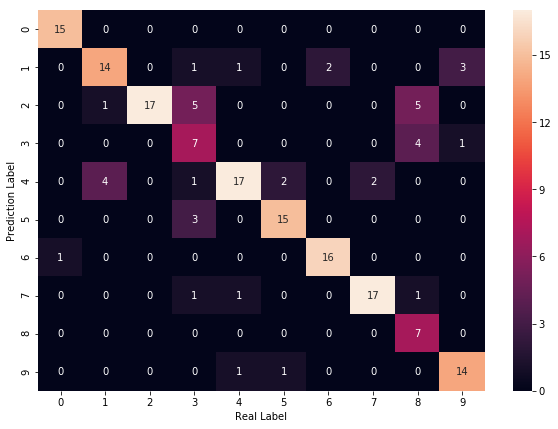

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:10 index:[5] real:5
#1 min_error:14 index:[2] real:2
#2 min_error:12 index:[8] real:8
#3 min_error:2 index:[0] real:0
#4 min_error:7 index:[1] real:1
#5 min_error:8 index:[7] real:7
#6 min_error:5 index:[6] real:6
#7 min_error:13 index:[2] real:3
#8 min_error:4 index:[2] real:2
#9 min_error:9 index:[1] real:1
#10 min_error:12 index:[7] real:7
#11 min_error:12 index:[1] real:4
#12 min_error:5 index:[6] real:6
#13 min_error:12 index:[3] real:3
#14 min_error:9 index:[1] real:1
#15 min_error:13 index:[2] real:3
#16 min_error:12 index:[1] real:9
#17 min_error:8 index:[1] real:1
#18 min_error:12 index:[7] real:7
#19 min_error:2 index:[6] real:6
#20 min_error:12 index:[8] real:8
#21 min_error:9 index:[4] real:4
#22 min_error:11 index:[3] real:3
#23 min_error:11 index:[1] real:1
#24 min_error:5 index:[4] real:4
#25 min_error:9 index:[0] real:0
#26 min_error:6 index:[5] real:5
#27 min_error:9 index:[3] real:3
#28 min_error:15 index:[1] real:6
#29 min_error:11 index:[9] real:9
#30 m

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
np.mean(winner_fitness)

0.823445337731052

In [17]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1388888888888889
Accuracy on training set: 0.1388888888888889
Accuracy on training set: 0.2
Accuracy on training set: 0.3
Accuracy on training set: 0.38333333333333336
Accuracy on training set: 0.39444444444444443
Accuracy on training set: 0.4777777777777778
Accuracy on training set: 0.45555555555555555
Accuracy on training set: 0.5388888888888889
Accuracy on training set: 0.6166666666666667
Accuracy on training set: 0.6277777777777778
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6777777777777778
Accuracy on training set: 0.7055555555555556
Accuracy on training set: 0.7111111111111111
Accuracy on training set: 0.7555555555555555
Accuracy on training set: 0.7777777777777778
Accuracy on training set: 0.7611111111111111
Accuracy on training set: 0.7333333333333333
Accuracy on training set: 0.75
Accuracy on training set: 0.7666666666666667
Accuracy on training set: 0.7555555555555555
Accuracy on training set: 0.7444444444444445
Accura

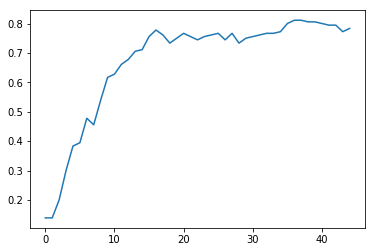

In [18]:
plt.plot(range(45),list_acc)
plt.show()

In [19]:
list_acc

[0.1388888888888889,
 0.1388888888888889,
 0.2,
 0.3,
 0.38333333333333336,
 0.39444444444444443,
 0.4777777777777778,
 0.45555555555555555,
 0.5388888888888889,
 0.6166666666666667,
 0.6277777777777778,
 0.6611111111111111,
 0.6777777777777778,
 0.7055555555555556,
 0.7111111111111111,
 0.7555555555555555,
 0.7777777777777778,
 0.7611111111111111,
 0.7333333333333333,
 0.75,
 0.7666666666666667,
 0.7555555555555555,
 0.7444444444444445,
 0.7555555555555555,
 0.7611111111111111,
 0.7666666666666667,
 0.7444444444444445,
 0.7666666666666667,
 0.7333333333333333,
 0.75,
 0.7555555555555555,
 0.7611111111111111,
 0.7666666666666667,
 0.7666666666666667,
 0.7722222222222223,
 0.8,
 0.8111111111111111,
 0.8111111111111111,
 0.8055555555555556,
 0.8055555555555556,
 0.8,
 0.7944444444444444,
 0.7944444444444444,
 0.7722222222222223,
 0.7833333333333333]

In [20]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8639455782312925
Avg Base Learner:0.823445337731052
